Epoch 1/10
26/26 [==============================] - 0s 7ms/step - loss: 0.6497 - val_loss: 0.5713
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.4978 - val_loss: 0.4463
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 0.4263 - val_loss: 0.4205
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.4100 - val_loss: 0.4092
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3987 - val_loss: 0.3995
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3892 - val_loss: 0.3905
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3797 - val_loss: 0.3798
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3679 - val_loss: 0.3672
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3543 - val_loss: 0.3531
Epoch 10/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3417 - val_loss: 0.3428


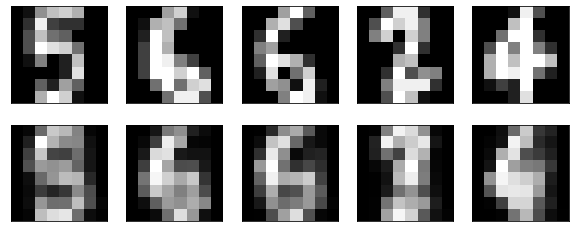

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import datasets
from keras.layers import Input, Dense
from keras.models import Model

data = datasets.load_digits()

X_data = data.images
y_data = data.target

X_data = X_data.reshape(X_data.shape[0], 64)

# fit in data instances into interval [0,1]
X_data = X_data / 16.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

def encoder_decoder(code_dim = 10):
    inputs = Input(shape = (X_train.shape[1],))
    code = Dense(50, activation= 'relu')(inputs)
    code = Dense(50, activation = 'relu')(code)
    code = Dense(code_dim, activation = 'relu')(code)
    
    outputs = Dense(50, activation = 'relu')(code)
    outputs = Dense(50, activation = 'relu')(outputs)
    outputs = Dense(X_train.shape[1], activation = 'sigmoid')(outputs)
    
    auto_encoder = Model(inputs = inputs, outputs = outputs)
    auto_encoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    
    return auto_encoder

auto_encoder = encoder_decoder()
auto_encoder.fit(X_train, X_train, epochs = 10, batch_size = 50, validation_data = (X_test, X_test))

decoded = auto_encoder.predict(X_test)

plt.figure(figsize = (10,4))

n = 5
for i in range(n):
    # visualizing test data instances
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(8,8))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # visualizing encode-decoded test data instances
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded[i].reshape(8,8))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()